
# Chapter 1: Introduction to Statistical Inference

**Core Goal:** Use sample data to draw valid conclusions about populations.

**Motivation:** In practice, we rarely have access to complete population data. Medical researchers cannot test drugs on every patient, pollsters cannot survey every voter, and manufacturers cannot inspect every product. Statistical inference provides principled methods to make reliable statements about populations based on limited sample data, while quantifying our uncertainty.

In [7]:
import numpy as np
import scipy.stats as stats

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

## 1.1 Population versus Sample

**Population:** The complete set of all individuals or items of interest for a particular study.

**Sample:** A subset of the population that we actually observe and measure.

**Motivation:** Collecting data from an entire population is typically impossible or impractical due to cost, time, or destructive testing. We must learn to draw conclusions about the whole from observing only a part. The fundamental challenge of statistical inference is to determine how much information a sample provides about its parent population.

In [ ]:
# N(μ,σ²): Normal distribution with mean μ=100, standard deviation σ=15 (population distribution)
np.random.seed(42)
population = stats.norm(loc=100, scale=15)

In [ ]:
# X ~ F: Draw random sample of size n from distribution F (sampling)
sample = population.rvs(size=30)
print(f"Sample (first 5 values): {sample[:5]}")

**Key Insight:** We never observe the full population, only samples drawn from it. All inference involves reasoning from the known (sample) to the unknown (population).

## 1.2 Parameters versus Statistics

**Parameter (θ):** A numerical characteristic of a population. Parameters are fixed but unknown constants.

**Statistic:** A numerical characteristic computed from sample data. Statistics are random variables that vary from sample to sample.

**Motivation:** Parameters describe what we want to know (population characteristics), while statistics describe what we can compute (sample summaries). The relationship between statistics and parameters is central to inference. We use statistics as estimators of parameters, and understanding how statistics behave across different samples allows us to quantify uncertainty in our estimates.

In [11]:
true_mu = 100  # Population mean (parameter)
true_sigma = 15  # Population standard deviation (parameter)

In [ ]:
# X̄ = (1/n)Σxᵢ: Sample mean estimates population mean μ (point estimation)
sample_mean = np.mean(sample)
# s = √[(1/(n-1))Σ(xᵢ-X̄)²]: Sample standard deviation estimates population σ (unbiased estimator)
sample_std = np.std(sample, ddof=1)

In [13]:
print(f"True μ = {true_mu}, Estimated μ̂ = {sample_mean:.2f}")
print(f"True σ = {true_sigma}, Estimated σ̂ = {sample_std:.2f}")

True μ = 100, Estimated μ̂ = 97.18
True σ = 15, Estimated σ̂ = 13.50


**Notation Convention:** $\theta$ denotes a parameter, $\hat{\theta}$ denotes an estimator of that parameter.

## 1.3 Random Variables

**Random Variable:** A function that assigns a numerical value to each outcome of a random experiment.

**Motivation:** Random variables provide the mathematical framework for modeling uncertainty. They allow us to move from describing specific outcomes to analyzing the pattern of all possible outcomes. In statistical inference, both the data we observe and the statistics we compute are realizations of random variables. Understanding their probabilistic behavior is essential for making valid inferences.

In [ ]:
# Binomial(n,p): Number of successes in n independent trials with probability p (discrete distribution)
X_discrete = stats.binom(n=10, p=0.3)

In [ ]:
# N(μ,σ²): Normal distribution with mean μ and variance σ² (continuous distribution)
X_continuous = stats.norm(loc=0, scale=1)

**Discrete Random Variable:** Takes countable values (0, 1, 2, ...).

**Continuous Random Variable:** Takes any value in an interval or union of intervals.

## 1.4 Probability Distributions

**Probability Distribution:** A mathematical function that describes the likelihood of different outcomes for a random variable.

**Motivation:** Distributions summarize all probabilistic information about a random variable. They tell us not just what values are possible, but how likely each value is. In inference, we assume data follow a particular distribution family, and our goal becomes estimating the parameters of that distribution. The choice of distribution shapes every subsequent inference.

### Probability Mass Function (Discrete)

**Probability Mass Function:** For discrete random variable $X$, $P(X = k)$ gives probability at each point $k$.

In [ ]:
# P(X=k): Probability mass function gives probability at each discrete value k (PMF)
k_values = np.arange(0, 11)
pmf_values = X_discrete.pmf(k_values)

Text(0, 0.5, 'P(X=k)')

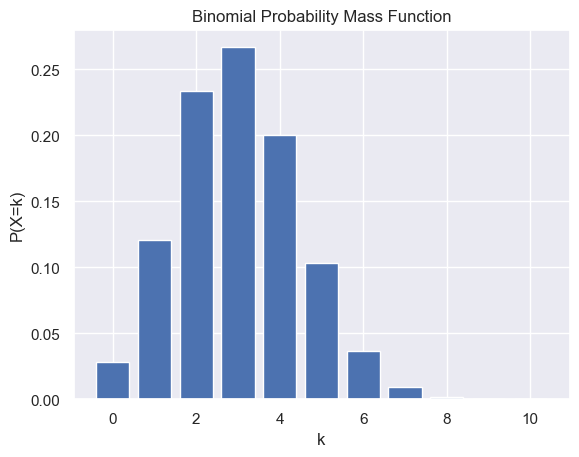

In [17]:
plt.bar(k_values, pmf_values)
plt.title('Binomial Probability Mass Function'); plt.xlabel('k'); plt.ylabel('P(X=k)')

### Probability Density Function (Continuous)

**Probability Density Function:** For continuous $X$, $f(x)$ is density at point $x$. Probability is area under curve: $P(a < X < b) = \int_a^b f(x)dx$.

In [ ]:
# f(x): Probability density function gives relative likelihood at each continuous value x (PDF)
x_values = np.linspace(-4, 4, 100)
pdf_values = X_continuous.pdf(x_values)

Text(0, 0.5, 'f(x)')

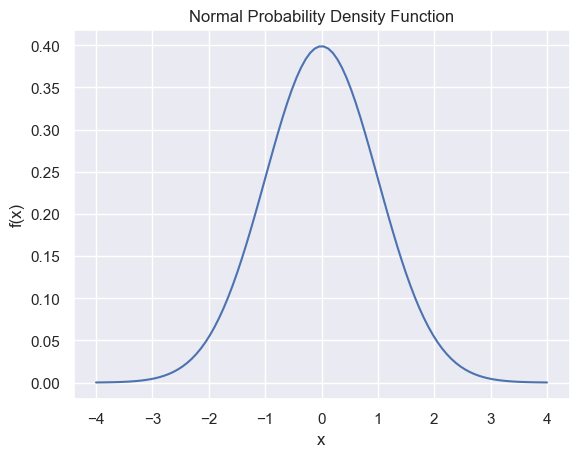

In [19]:
plt.plot(x_values, pdf_values)
plt.title('Normal Probability Density Function'); plt.xlabel('x'); plt.ylabel('f(x)')

### Cumulative Distribution Function

**Cumulative Distribution Function:** $F(x) = P(X \leq x)$ gives probability of observing value at most $x$.

**Motivation:** The cumulative distribution function provides cumulative probabilities and is useful for computing tail probabilities and quantiles, which appear throughout hypothesis testing and confidence intervals.

In [ ]:
# F(x) = P(X ≤ x): Cumulative distribution function gives probability of value at most x (CDF)
cdf_values = X_continuous.cdf(x_values)
plt.plot(x_values, cdf_values)

Text(0, 0.5, 'F(x) = P(X ≤ x)')

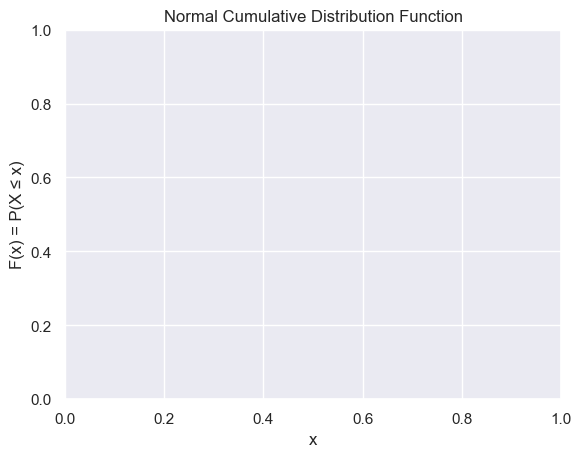

In [21]:
plt.title('Normal Cumulative Distribution Function')
plt.xlabel('x'); plt.ylabel('F(x) = P(X ≤ x)')

## 1.5 Expected Value and Variance

**Expected Value:** $E[X] = \mu$ is the long-run average value of random variable $X$.

**Variance:** $\text{Var}(X) = E[(X - \mu)^2] = \sigma^2$ measures spread of distribution around its mean.

**Motivation:** Expected value and variance are the two most fundamental characteristics of any distribution. Expected value tells us the center (where the distribution is located), while variance tells us the spread (how dispersed values are). These two quantities alone fully characterize normal distributions, and they appear in virtually every statistical procedure. Understanding their properties is essential for inference.

In [ ]:
# E[X] and Var(X): Expected value (long-run average) and variance (spread around mean)
mean_binomial = X_discrete.mean()
variance_binomial = X_discrete.var()

In [23]:
print(f"E[X] = {mean_binomial:.2f}, Var(X) = {variance_binomial:.2f}")
print(f"Binomial formulas: E[X] = np = {10*0.3}, Var(X) = np(1-p) = {10*0.3*0.7}")

E[X] = 3.00, Var(X) = 2.10
Binomial formulas: E[X] = np = 3.0, Var(X) = np(1-p) = 2.0999999999999996


### Standard Deviation

**Standard Deviation:** $\sigma = \sqrt{\text{Var}(X)}$ is square root of variance, measured in same units as $X$.

**Motivation:** While variance is mathematically convenient, its units are squared. Standard deviation returns to original units, making it more interpretable for describing spread.

In [ ]:
# σ = √Var(X): Standard deviation in original units, square root of variance (spread measure)
std_binomial = X_discrete.std()
print(f"Standard Deviation σ = {std_binomial:.2f}")

## 1.6 Common Probability Distributions

**Motivation:** Certain probability distributions appear repeatedly in statistical inference. Understanding their properties and relationships is crucial because different inference procedures depend on different distributional assumptions. These distributions form the theoretical foundation for most classical inference methods.

### Normal Distribution $N(\mu, \sigma^2)$

**Normal Distribution:** Continuous distribution defined by two parameters: mean $\mu$ and variance $\sigma^2$.

**Probability Density Function:** $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ for $-\infty < x < \infty$

**Motivation:** The normal distribution is the most important distribution in statistics. Many natural phenomena are approximately normally distributed. More importantly, due to the Central Limit Theorem, sample means tend toward normality regardless of the original population distribution. This makes normal-based inference remarkably robust and widely applicable.

In [25]:
normal_dist = stats.norm(loc=100, scale=15)
print(f"Parameters: μ = 100, σ = 15")

Parameters: μ = 100, σ = 15


In [ ]:
# P(μ-σ < X < μ+σ) ≈ 0.68: Approximately 68% of normal data within 1 standard deviation of mean (68-95-99.7 rule)
print(f"P(μ - σ < X < μ + σ) = {normal_dist.cdf(115) - normal_dist.cdf(85):.3f}")

### Standard Normal Distribution $Z \sim N(0,1)$

**Standard Normal Distribution:** Normal distribution with mean 0 and variance 1.

**Motivation:** Any normal random variable can be transformed to standard normal via standardization. This allows us to use a single standard normal table for all normal probability calculations. Critical values for hypothesis tests and confidence intervals are typically expressed in terms of standard normal quantiles.

In [ ]:
# P(Z < z): Standard normal cumulative probability, used for critical values in inference (standard normal CDF)
print(f"P(Z < 1.96) = {standard_normal.cdf(1.96):.4f}")

**Standardization:** Any normal variable $X \sim N(\mu, \sigma^2)$ can be transformed to standard normal: $Z = \frac{X - \mu}{\sigma} \sim N(0,1)$

In [ ]:
# Z = (X - μ)/σ: Standardization transforms any normal to standard normal (z-score)
x = 130
z_score = (x - 100) / 15; print(f"Z-score for x=130: {z_score:.2f}")

### Student's t-distribution

**Student's t-distribution:** Distribution with heavier tails than normal, characterized by degrees of freedom parameter.

**Motivation:** When estimating a population mean with unknown variance from a small sample, using the sample standard deviation introduces additional uncertainty. The t-distribution accounts for this extra variability. It is essential for small-sample inference about means. As sample size increases (degrees of freedom increase), the t-distribution approaches the normal distribution.

In [ ]:
# t(ν): Student's t-distribution with ν degrees of freedom, heavier tails than normal (t-distribution)
t_distribution = stats.t(df=10)
x = np.linspace(-4, 4, 100)

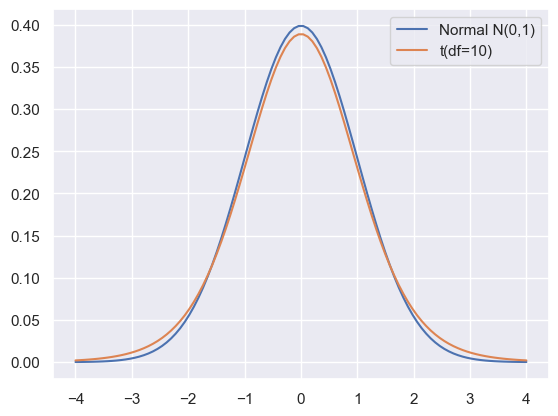

In [33]:
plt.plot(x, standard_normal.pdf(x), label='Normal N(0,1)')
plt.plot(x, t_distribution.pdf(x), label='t(df=10)'); plt.legend()

Text(0, 0.5, 'Density')

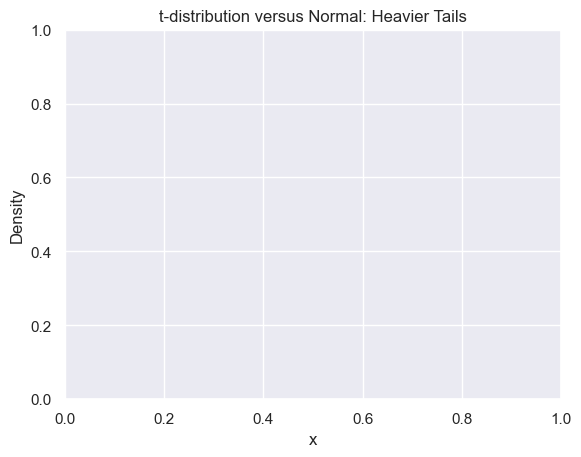

In [34]:
plt.title('t-distribution versus Normal: Heavier Tails')
plt.xlabel('x'); plt.ylabel('Density')

**Key Property:** As degrees of freedom $\nu \to \infty$, $t_\nu \to N(0,1)$

### Chi-squared Distribution $\chi^2$

**Chi-squared Distribution:** Distribution of sum of squared independent standard normal variables.

**Definition:** If $Z_1, ..., Z_\nu$ are independent $N(0,1)$, then $\chi^2 = \sum_{i=1}^\nu Z_i^2 \sim \chi^2_\nu$

**Motivation:** The chi-squared distribution arises naturally when dealing with variance estimation. Sample variance, when properly scaled, follows a chi-squared distribution. This makes it fundamental for inference about population variances and for goodness-of-fit tests.

In [ ]:
# χ²(ν): Chi-squared distribution with ν degrees of freedom, sum of squared standard normals (chi-squared distribution)
chi2_distribution = stats.chi2(df=5)
x = np.linspace(0, 20, 100)

Text(0, 0.5, 'Density')

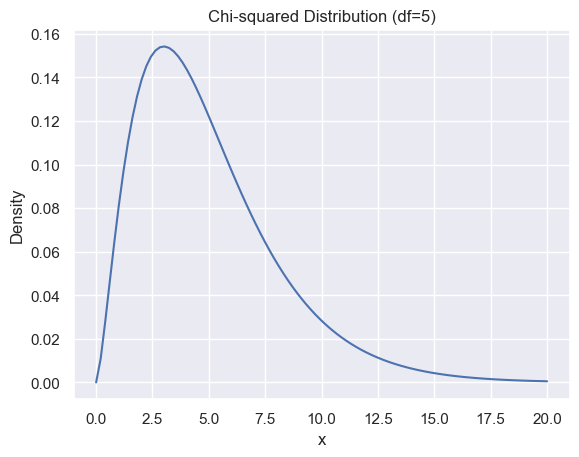

In [36]:
plt.plot(x, chi2_distribution.pdf(x))
plt.title('Chi-squared Distribution (df=5)'); plt.xlabel('x'); plt.ylabel('Density')

**Primary Uses:** Variance estimation, goodness-of-fit tests, tests of independence.

### F-distribution

**F-distribution:** Distribution of ratio of two independent chi-squared random variables, each divided by its degrees of freedom.

**Definition:** If $\chi^2_1 \sim \chi^2_{\nu_1}$ and $\chi^2_2 \sim \chi^2_{\nu_2}$ are independent, then $F = \frac{\chi^2_1/\nu_1}{\chi^2_2/\nu_2} \sim F_{\nu_1, \nu_2}$

**Motivation:** The F-distribution appears when comparing two variances or when partitioning variance into components. It is the foundation of Analysis of Variance (ANOVA) and regression F-tests, which compare explained versus unexplained variation.

In [ ]:
# F(ν₁,ν₂): F-distribution, ratio of two chi-squared distributions scaled by degrees of freedom (F-distribution)
f_distribution = stats.f(dfn=5, dfd=10)
x = np.linspace(0, 5, 100)

Text(0, 0.5, 'Density')

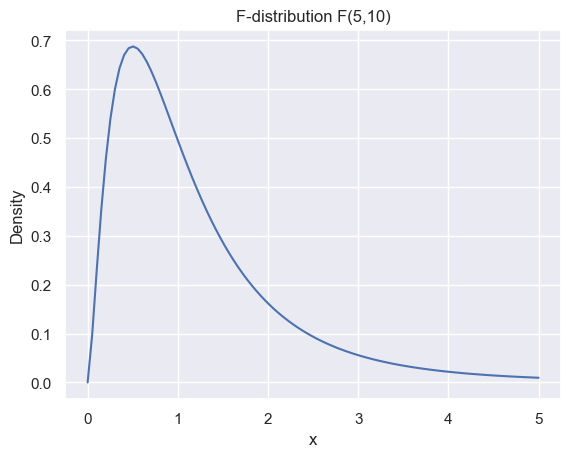

In [38]:
plt.plot(x, f_distribution.pdf(x))
plt.title('F-distribution F(5,10)'); plt.xlabel('x'); plt.ylabel('Density')

**Primary Uses:** Comparing variances, Analysis of Variance (ANOVA), regression model testing.

## 1.7 Sampling Distributions

**Sampling Distribution:** The probability distribution of a statistic obtained from all possible samples of size $n$.

**Motivation:** A statistic varies from sample to sample because samples vary. The sampling distribution describes this variation and quantifies the precision of our estimator. Understanding sampling distributions allows us to make probability statements about how close our estimate is likely to be to the true parameter. This is the bridge between sample statistics and population parameters.

In [ ]:
# X̄ ~ N(μ, σ²/n): Sampling distribution of sample mean, simulated by repeated sampling (sampling distribution)
sample_means = [population.rvs(30).mean() for _ in range(1000)]

Text(0, 0.5, 'Density')

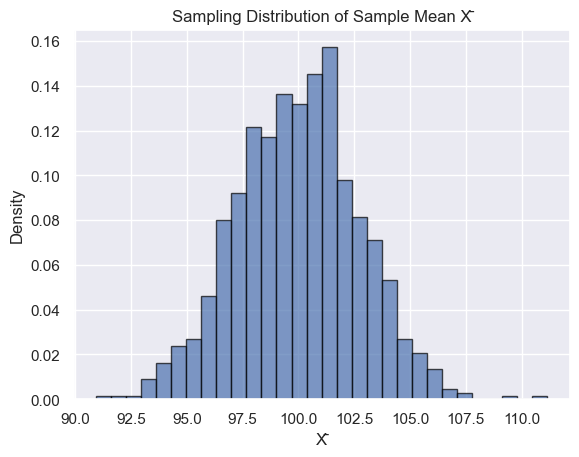

In [40]:
plt.hist(sample_means, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.title('Sampling Distribution of Sample Mean X̄'); plt.xlabel('X̄'); plt.ylabel('Density')

**Theoretical Result:** When sampling from $N(\mu, \sigma^2)$, the sample mean follows $\bar{X} \sim N(\mu, \sigma^2/n)$

In [41]:
print(f"E[X̄] - Theory: {true_mu}, Empirical: {np.mean(sample_means):.2f}")
print(f"Standard Error - Theory: {true_sigma/np.sqrt(30):.2f}, Empirical: {np.std(sample_means):.2f}")

E[X̄] - Theory: 100, Empirical: 99.99
Standard Error - Theory: 2.74, Empirical: 2.72


## 1.8 Central Limit Theorem

**Central Limit Theorem:** For large sample size $n$, the distribution of $\bar{X}$ is approximately normal regardless of the population distribution.

**Formal Statement:** If $X_1, ..., X_n$ are independent and identically distributed with mean $\mu$ and variance $\sigma^2$, then $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0,1)$ as $n \to \infty$

**Motivation:** The Central Limit Theorem is arguably the most important result in statistics. It explains why normal distributions appear everywhere in practice and why normal-based inference works even when data are not normal. It provides theoretical justification for using normal approximations with large samples, making inference possible without knowing the exact population distribution.

In [ ]:
# Exponential(λ): Highly skewed distribution, mean = 1/λ = 2 (non-normal population for Central Limit Theorem demo)
exponential_population = stats.expon(scale=2)

In [ ]:
# Central Limit Theorem: Sample means from non-normal population still approximately normal (Central Limit Theorem demonstration)
exponential_means = [exponential_population.rvs(30).mean() for _ in range(1000)]

Text(0.5, 0, 'X̄')

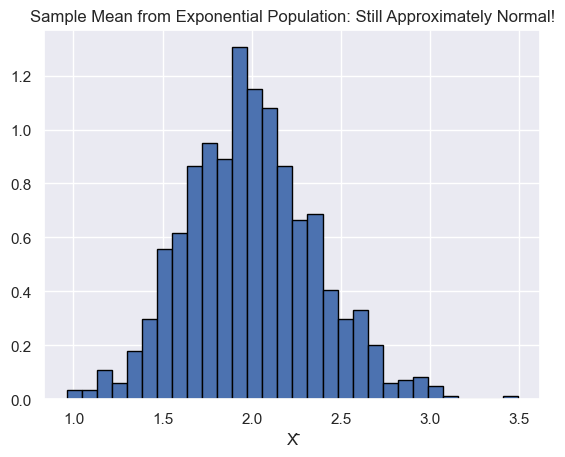

In [44]:
plt.hist(exponential_means, bins=30, density=True, edgecolor='black')
plt.title('Sample Mean from Exponential Population: Still Approximately Normal!'); plt.xlabel('X̄')

**Practical Implication:** Normal theory applies broadly to sample means, even when individual observations are non-normal.

## 1.9 Three Types of Statistical Inference

**Motivation:** Statistical inference answers three fundamental questions about parameters: What is a good single estimate? What range of values is plausible? Is a specific hypothesized value consistent with the data? These correspond to point estimation, interval estimation, and hypothesis testing.

### 1.9.1 Point Estimation

**Point Estimation:** Using sample data to calculate a single number as an estimate of an unknown parameter.

**Motivation:** Point estimates provide our "best guess" for a parameter value. While they do not convey uncertainty, they are often required for decision-making and form the basis for more sophisticated inference procedures.

In [ ]:
# X̄: Sample mean as point estimate for population mean μ (point estimation)
data = stats.norm(100, 15).rvs(50)
mu_hat = np.mean(data)

In [46]:
print(f"Point estimate for μ: μ̂ = {mu_hat:.2f}")
print("This is our single best guess for the population mean.")

Point estimate for μ: μ̂ = 99.34
This is our single best guess for the population mean.


### 1.9.2 Interval Estimation (Confidence Intervals)

**Confidence Interval:** A range of plausible values for a parameter, constructed so that it captures the true parameter value with specified probability (confidence level).

**Motivation:** A point estimate alone provides no information about precision. A confidence interval quantifies uncertainty by giving a range of plausible parameter values. The confidence level (typically 95%) refers to the long-run proportion of such intervals that contain the true parameter if we repeated the sampling process many times.

In [ ]:
# X̄ ± t* · SE: Confidence interval for μ using t-distribution critical value (confidence interval)
standard_error = stats.sem(data)
confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mu_hat, scale=standard_error)

In [48]:
print(f"95% Confidence Interval for μ: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")
print("We are 95% confident this interval contains the true population mean.")

95% Confidence Interval for μ: [94.79, 103.90]
We are 95% confident this interval contains the true population mean.


**Correct Interpretation:** If we repeated this procedure many times with different samples, approximately 95% of the resulting intervals would contain the true parameter value.

### 1.9.3 Hypothesis Testing

**Hypothesis Testing:** A formal procedure for assessing whether sample data provide sufficient evidence to reject a specific claim about a parameter.

**Motivation:** Often we want to determine whether data support or contradict a specific hypothesis. For example, does a drug work better than placebo? Is a coin fair? Hypothesis testing provides a principled framework for making such decisions while controlling the probability of false conclusions. The p-value quantifies how surprising the observed data would be if the hypothesis were true.

In [ ]:
# t = (X̄ - μ₀)/(s/√n): One-sample t-test statistic for testing H₀: μ = μ₀ (hypothesis testing)
test_result = stats.ttest_1samp(data, 105)

In [50]:
print(f"Test statistic: t = {test_result.statistic:.3f}")
print(f"P-value: {test_result.pvalue:.3f}")

Test statistic: t = -2.495
P-value: 0.016


**Decision Rule:** Reject null hypothesis H₀ if p-value < significance level α (typically α = 0.05).

**P-value Interpretation:** Probability of observing a test statistic at least as extreme as ours, assuming H₀ is true.

In [51]:
decision = "Reject H₀" if test_result.pvalue < 0.05 else "Fail to reject H₀"
print(f"Decision at α = 0.05: {decision}")

Decision at α = 0.05: Reject H₀


## 1.10 Standard Error versus Standard Deviation

**Standard Deviation:** Measures variability of individual observations in a population or sample: $\sigma = \sqrt{\text{Var}(X)}$

**Standard Error:** Measures variability of a sample statistic across different samples: $\text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}}$

**Motivation:** These two concepts are often confused but measure fundamentally different things. Standard deviation describes spread in the data itself. Standard error describes precision of an estimator. As sample size increases, standard deviation stays roughly constant (it estimates a fixed population parameter), but standard error decreases (our estimator becomes more precise).

In [ ]:
# s = √[(1/(n-1))Σ(xᵢ-X̄)²]: Sample standard deviation measures spread of observations (standard deviation)
sample_sd = np.std(data, ddof=1)
print(f"Standard Deviation of observations: {sample_sd:.2f}")

In [ ]:
# SE(X̄) = σ/√n: Standard error measures precision of sample mean estimator (standard error)
sample_se = sample_sd / np.sqrt(len(data))
print(f"Standard Error of sample mean: {sample_se:.2f}")

**Key Formula:** $\text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}}$. Standard error decreases as sample size increases, reflecting increased precision.

## 1.11 Bias and Variance of Estimators

**Bias:** The systematic error in an estimator: $\text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta$

**Unbiased Estimator:** An estimator with zero bias: $E[\hat{\theta}] = \theta$

**Motivation:** An estimator's quality depends on two factors: whether it hits the target on average (bias) and how much it varies (variance). Unbiased estimators are neither systematically too high nor too low. However, unbiasedness alone does not guarantee a good estimator; precision (low variance) is equally important.

In [ ]:
# E[θ̂] = θ: Average of estimates equals true parameter (unbiasedness)
estimates = [population.rvs(30).mean() for _ in range(5000)]

In [ ]:
# Bias = E[θ̂] - θ: Systematic error, difference between average estimate and true value (bias)
bias = np.mean(estimates) - true_mu
print(f"Bias of sample mean: {bias:.4f} (approximately 0, confirming unbiasedness)")

**Variance of Estimator:** $\text{Var}(\hat{\theta})$ measures how much the estimator varies across different samples. Lower variance means more precise estimation.

In [ ]:
# Var(X̄) = σ²/n: Variance of sample mean decreases with sample size (precision increases with n)
empirical_variance = np.var(estimates)
theoretical_variance = true_sigma**2 / 30

In [57]:
print(f"Empirical Var(X̄) = {empirical_variance:.2f}")
print(f"Theoretical Var(X̄) = σ²/n = {theoretical_variance:.2f}")

Empirical Var(X̄) = 7.50
Theoretical Var(X̄) = σ²/n = 7.50


## 1.12 Mean Squared Error

**Mean Squared Error:** Overall measure of estimator quality: $\text{MSE}(\hat{\theta}) = E[(\hat{\theta} - \theta)^2] = \text{Bias}^2(\hat{\theta}) + \text{Var}(\hat{\theta})$

**Motivation:** Mean squared error combines both bias and variance into a single measure of estimation accuracy. It represents the expected squared distance between estimator and true parameter. The decomposition into bias² and variance reveals that both systematic error and random variation contribute to total error. Sometimes accepting small bias yields lower variance and better overall mean squared error.

In [ ]:
# MSE = E[(θ̂-θ)²] = Bias² + Var(θ̂): Mean squared error combines bias and variance (total error)
mse = np.mean((np.array(estimates) - true_mu)**2)
print(f"Mean Squared Error of sample mean: {mse:.2f}")

In [59]:
# For unbiased estimator: MSE equals Variance
print(f"MSE ≈ Variance: {np.isclose(mse, empirical_variance)}")

MSE ≈ Variance: False


## 1.13 Law of Large Numbers

**Law of Large Numbers:** As sample size $n \to \infty$, the sample mean $\bar{X}$ converges in probability to the population mean $\mu$.

**Formal Statement:** $\bar{X}_n \xrightarrow{P} \mu$ as $n \to \infty$

**Motivation:** The Law of Large Numbers provides the theoretical justification for using sample averages to estimate population means. It guarantees that with enough data, our estimate will be arbitrarily close to the true value with high probability. This fundamental result underpins the entire practice of using samples to learn about populations.

In [ ]:
# X̄ₙ → μ as n → ∞: Law of Large Numbers shows sample mean converges to population mean (Law of Large Numbers)
sample_sizes = [10, 50, 100, 500, 1000, 5000]
means_by_size = [population.rvs(n).mean() for n in sample_sizes]

In [ ]:
plt.plot(sample_sizes, means_by_size, 'o-', markersize=8)
plt.axhline(true_mu, color='r', linestyle='--', linewidth=2, label='True μ')

In [ ]:
plt.xlabel('Sample Size n'); plt.ylabel('Sample Mean X̄')
plt.title('Law of Large Numbers: X̄ Converges to μ'); plt.legend()

## Summary: The Statistical Inference Framework

1. **Population** contains unknown parameter $\theta$ that we want to learn about
2. Draw **random sample** $X_1, X_2, ..., X_n$ from the population
3. Compute **statistic** $\hat{\theta}$ (estimator) from the sample
4. Use **sampling distribution** of $\hat{\theta}$ to quantify uncertainty
5. Perform inference using one of three methods:
   - **Point estimation:** Single best estimate
   - **Interval estimation:** Range of plausible values with confidence level
   - **Hypothesis testing:** Assess evidence for or against specific claim

## Key Takeaways

- **Randomness is fundamental:** Samples vary randomly, causing statistics to vary. Understanding this variation is essential for inference.

- **Sampling distributions quantify uncertainty:** The distribution of a statistic across all possible samples tells us how precise our estimates are.

- **Central Limit Theorem enables robust inference:** Sample means are approximately normal for large samples, regardless of population distribution, making normal-based methods widely applicable.

- **Good estimators balance bias and variance:** Unbiased estimators hit the target on average, but low variance (high precision) is equally important. Mean squared error captures both.

- **Standard error quantifies precision:** Standard error measures how much an estimator varies across samples. It decreases with $\sqrt{n}$, so larger samples give more precise estimates.

- **Three types of inference address different questions:** Point estimates provide best guesses, confidence intervals quantify uncertainty, and hypothesis tests assess specific claims.